## Prerquisites

In [22]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

In [4]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d yarenyilmaz/atm-transactions/

Dataset URL: https://www.kaggle.com/datasets/yarenyilmaz/atm-transactions/versions/
License(s): other
  0% 0.00/1.98M [00:00<?, ?B/s]
100% 1.98M/1.98M [00:00<00:00, 151MB/s]


In [7]:
with zipfile.ZipFile("atm-transactions.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

## Loading data

In [10]:
df = pd.read_csv("atm_transactions.csv")

In [11]:
df.head()

,atmId,atmName,atmCity,atmAddress,totalBalance,numberIncomeTransaction,numberOutcomeTransaction,totalIncome,totalOutcome,totalNumberTransaction,day,transactionTime
0,atm350000,ALİAĞA BAĞLI ŞB,Izmir,Aliağa Petkim Tesisleri,40000,0,0,0,0,0,Wednesday,2020-01-01 00:00:00
1,atm350001,ALİAĞA İSTİKLAL CADDESİ,Izmir,ATATÜRK İSTİKLAL CD. NO:97,40000,0,0,0,0,0,Wednesday,2020-01-01 00:00:00
2,atm350002,ALİAĞA PAZARYERİ,Izmir,ALİAĞA KAPALI PAZAR GİRİŞİ,40000,0,0,0,0,0,Wednesday,2020-01-01 00:00:00
3,atm350003,ALİAĞA SAHİL PARKI,Izmir,ALİAĞA HİKMET CD.SAHİL PARKI ÖNÜ,40000,0,0,0,0,0,Wednesday,2020-01-01 00:00:00
4,atm350004,ALİAĞA ŞUBE-1,Izmir,İstiklal Caddesi No: 64 / A,40000,0,0,0,0,0,Wednesday,2020-01-01 00:00:00


In [12]:
df.shape

(30156, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30156 entries, 0 to 30155
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   atmId                     30156 non-null  object
 1   atmName                   30156 non-null  object
 2   atmCity                   30156 non-null  object
 3   atmAddress                30156 non-null  object
 4   totalBalance              30156 non-null  int64 
 5   numberIncomeTransaction   30156 non-null  int64 
 6   numberOutcomeTransaction  30156 non-null  int64 
 7   totalIncome               30156 non-null  int64 
 8   totalOutcome              30156 non-null  int64 
 9   totalNumberTransaction    30156 non-null  int64 
 10  day                       30156 non-null  object
 11  transactionTime           30156 non-null  object
dtypes: int64(6), object(6)
memory usage: 2.8+ MB


# EDA

In [14]:
df.describe()

,totalBalance,numberIncomeTransaction,numberOutcomeTransaction,totalIncome,totalOutcome,totalNumberTransaction
count,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000,30156.000000
mean,24903.350245,48.157348,55.087711,3089.089733,3533.655989,103.245059
std,12140.702121,31.311923,33.360273,2063.646238,2200.795855,61.045114
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15050.000000,16.000000,16.000000,1015.000000,1015.000000,27.000000
50%,25820.000000,50.000000,64.000000,3145.000000,4075.000000,125.000000
75%,35335.000000,76.000000,84.000000,4835.000000,5310.000000,153.000000
max,57050.000000,100.000000,100.000000,8440.000000,9710.000000,200.000000


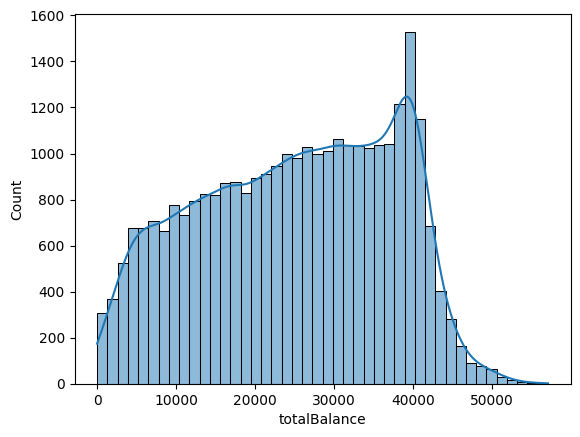

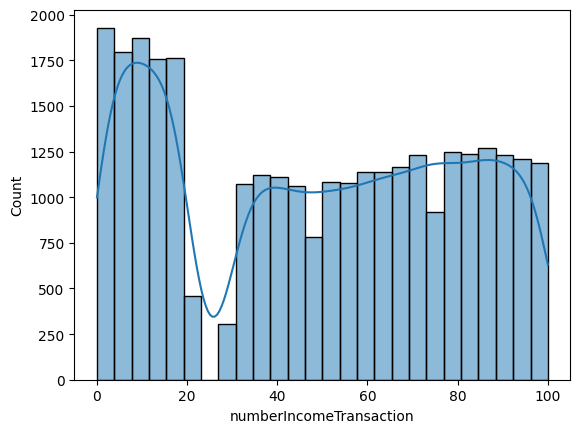

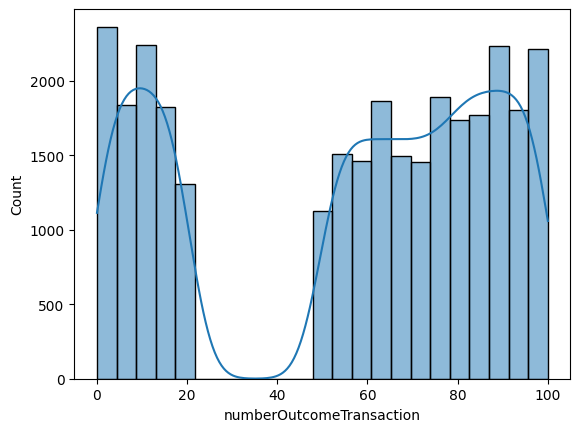

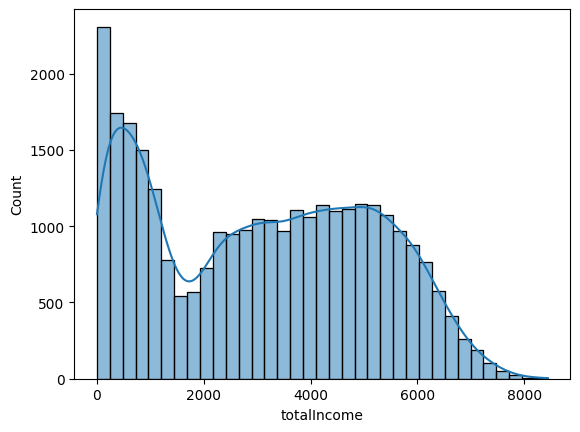

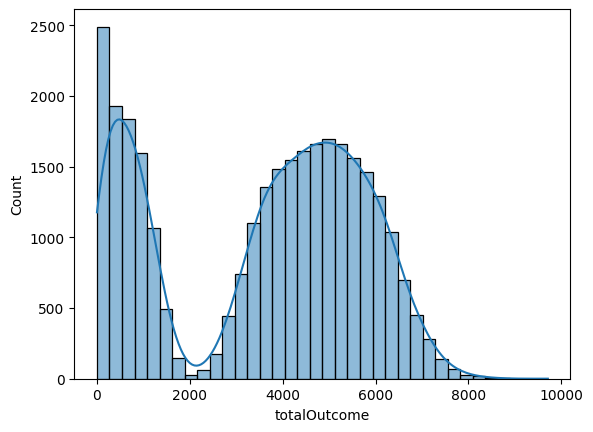

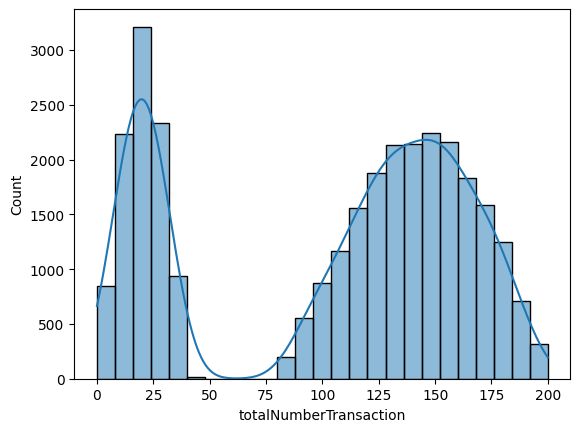

In [40]:
sns.histplot(df['totalBalance'], kde=True)
plt.show()

sns.histplot(df['numberIncomeTransaction'], kde=True)
plt.show()

sns.histplot(df['numberOutcomeTransaction'], kde=True)
plt.show()

sns.histplot(df['totalIncome'], kde=True)
plt.show()

sns.histplot(df['totalOutcome'], kde=True)
plt.show()

sns.histplot(df['totalNumberTransaction'], kde=True)
plt.show()

In [44]:
df.columns

Index(['atmId', 'atmName', 'atmCity', 'atmAddress', 'totalBalance',
       'numberIncomeTransaction', 'numberOutcomeTransaction', 'totalIncome',
       'totalOutcome', 'totalNumberTransaction', 'day', 'transactionTime'],
      dtype='object')

In [47]:
for c in df.columns:
    print(df[c].value_counts())
    print()

atmId
atm350000      84
atm35000190    84
atm35000210    84
atm35000209    84
atm35000208    84
               ..
atm3500083     84
atm3500082     84
atm3500081     84
atm3500080     84
atm35000358    84
Name: count, Length: 359, dtype: int64

atmName
ALİAĞA BAĞLI ŞB              84
KARABAĞLAR ZEREK PETROL-1    84
GÜN SAZAK BULVARI            84
GİRNE CADDESİ ŞB-3           84
GİRNE CADDESİ ŞB-2           84
                             ..
PARK BORNOVA AVM             84
ÖZKANLAR ŞUBE CİVARI         84
ÖZKANLAR METRO İSTASYONU     84
OTOGAR                       84
URLA ŞUBE-2                  84
Name: count, Length: 359, dtype: int64

atmCity
Izmir    30156
Name: count, dtype: int64

atmAddress
Aşık Veysel Mahallesi Yeşillik Caddesi No: 443                                                                                                                                                                                                                                                         

## atmName

In [147]:
totalBalanceSum = df.groupby('atmName')['totalBalance'].sum().reset_index()
totalBalanceSum.sort_values(by='totalBalance', ascending=False)

,atmName,totalBalance
47,BASMANE ŞUBE-2-,3188065
82,BUCA AKDOĞAN CADDESİ,3118245
146,HEDEF ZİRAAT ATM,3086410
292,YEŞİLYURT DEVLET HAST.,2959915
142,HATAY CADDESİ ŞUBE-1,2893670
...,...,...
157,KARABAĞLAR ZEREK PETROL-1,1542040
270,TORBALI ŞUBE-1,1519085
245,PINAR ET/KEMALPAŞA,1475415
231,MİGROS MM ULUKENT,1470100


max summed totalBalance occurred in **BASMANE ŞUBE-2-**  
min summed totalBalance occurred in **ŞİRİNYER MİGROS**

In [148]:
totalIncomeSum = df.groupby('atmName')['totalIncome'].sum().reset_index()
totalIncomeSum.sort_values(by='totalIncome', ascending=False)

,atmName,totalIncome
249,POINT BORNOVA AVM,448765
343,İZMİR OPTIMUM AVM -2,444580
278,URLA MEYDAN AVM ÖNÜ,443395
188,KIDS MALL AVM,438790
93,CADDE PLUS AVM ÇEŞME,438655
...,...,...
194,KONAK TELEKOM,226700
180,KEMALPAŞA İNÖNÜ CADDESİ,223800
29,ALİAĞA İSTİKLAL CADDESİ,223775
115,EVKA-3 PROF.SİTESİ,222625


max summed totalIncome occurred in **POINT BORNOVA AVM**  
min summed totalIncome occurred in **PHİLİP MORİS TORBALI**

In [149]:
totalOutcomeSum = df.groupby('atmName')['totalOutcome'].sum().reset_index()
totalOutcomeSum.sort_values(by='totalOutcome', ascending=False)

,atmName,totalOutcome
338,İZMİR EGE PERLA AVM,495465
178,KASABA AVM MENEMEN,494440
249,POINT BORNOVA AVM,490110
343,İZMİR OPTIMUM AVM -2,489520
242,PARK BORNOVA AVM,485110
...,...,...
184,KEMERALTI ŞUBE-1,270135
233,MİGROS MMM BUCA KOOP.,268415
287,YENİ FOÇA,268185
146,HEDEF ZİRAAT ATM,268155


max summed totalOutcome occurred in **İZMİR EGE PERLA AVM**  
min summed totalOutcome occurred in **DİKİLİ ŞUBE-1**

From the above info, it can be said that ATMs experience more outcome than income



In [150]:
totalNumberTransactionSum = df.groupby('atmName')['totalNumberTransaction'].sum().reset_index()
totalNumberTransactionSum.sort_values(by='totalNumberTransaction', ascending=False)

,atmName,totalNumberTransaction
249,POINT BORNOVA AVM,14554
107,EGEPARK MAVİŞEHİR AVM,14391
71,BORNOVA MYVİA AVM ÖNÜ,14387
343,İZMİR OPTIMUM AVM -2,14386
278,URLA MEYDAN AVM ÖNÜ,14381
...,...,...
148,HİLAL İZBAN METRO,7955
53,BAYRAKLI ÇAY MAHALLESİ,7955
272,TİRE CUMHURİYET MEYDANI,7949
244,PHİLİP MORİS TORBALI,7895


max summed totalNumberTransactions occurred in **POINT BORNOVA AVM**  
min total totalNumberTransactions occurred in **ALİAĞA İSTİKLAL CADDESİ**

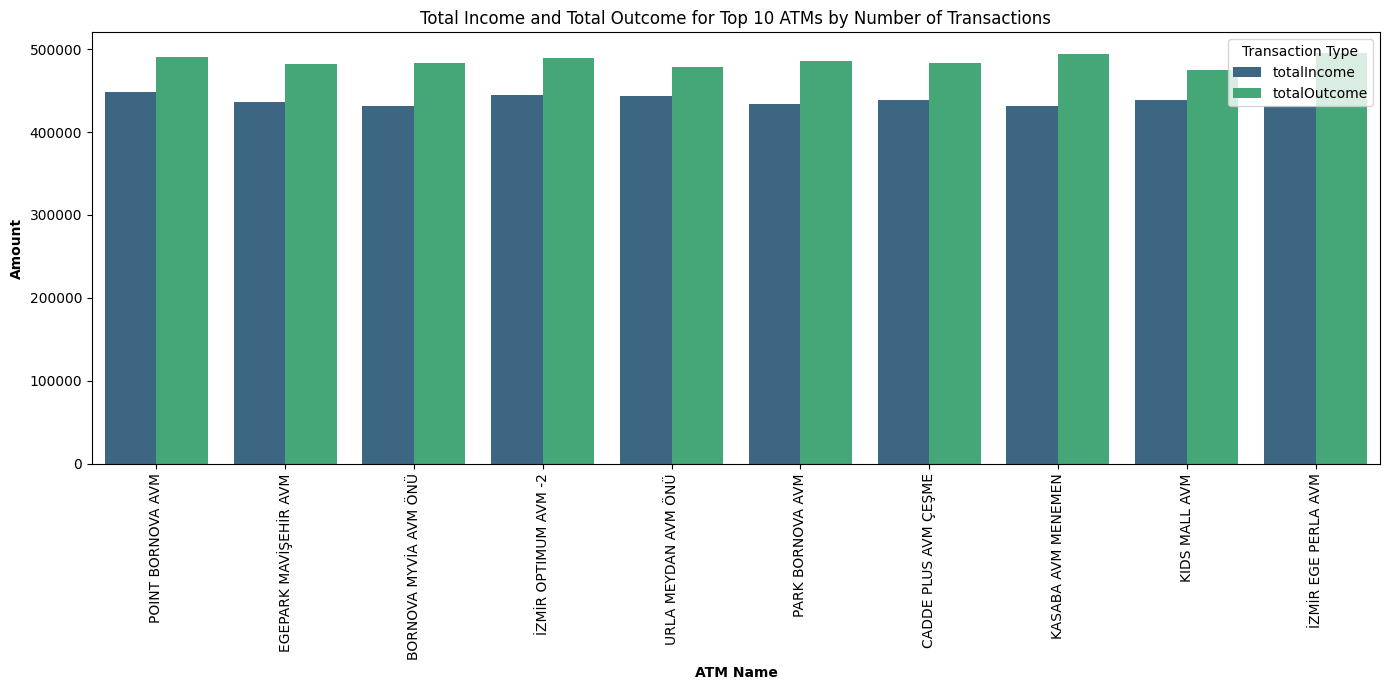

In [120]:
aggregated = df.groupby('atmName').agg({
    'totalIncome': 'sum',
    'totalOutcome': 'sum',
    'totalNumberTransaction': 'sum'
}).reset_index()

ten_sorted_aggregated = aggregated.sort_values(by='totalNumberTransaction', ascending=False).iloc[:10]

melted_df = ten_sorted_aggregated.melt(id_vars='atmName', value_vars=['totalIncome', 'totalOutcome'],
                             var_name='TransactionType', value_name='Amount')

plt.figure(figsize=(14, 7))
sns.barplot(x='atmName', y='Amount', hue='TransactionType', data=melted_df, palette='viridis')

plt.xlabel('ATM Name', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.title('Total Income and Total Outcome for Top 10 ATMs by Number of Transactions')
plt.xticks(rotation=90)
plt.legend(title='Transaction Type')

plt.tight_layout()
plt.show()


## atmAddress

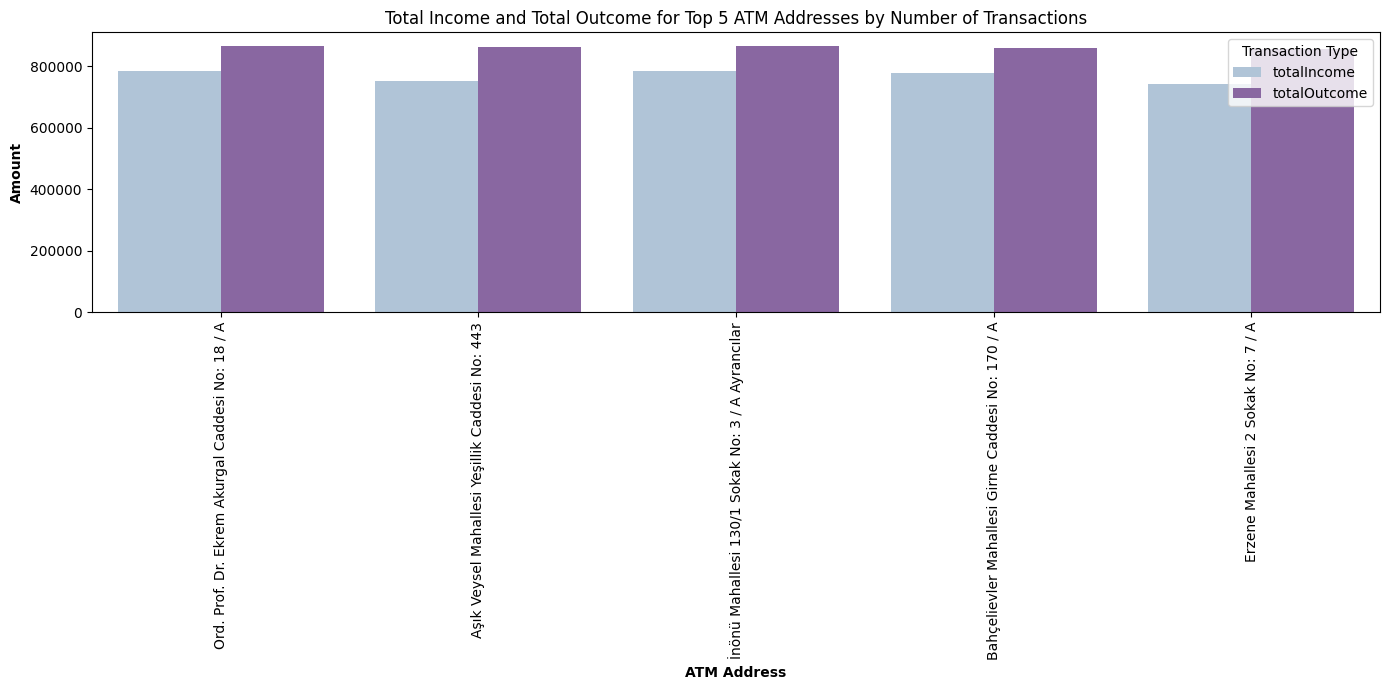

In [127]:
aggregated = df.groupby('atmAddress').agg({
    'totalIncome': 'sum',
    'totalOutcome': 'sum',
    'totalNumberTransaction': 'sum'
}).reset_index()

five_sorted_aggregated = aggregated.sort_values(by='totalNumberTransaction', ascending=False).iloc[:5]

melted_df = five_sorted_aggregated.melt(id_vars='atmAddress', value_vars=['totalIncome', 'totalOutcome'],
                             var_name='TransactionType', value_name='Amount')

plt.figure(figsize=(14, 7))
sns.barplot(x='atmAddress', y='Amount', hue='TransactionType', data=melted_df, palette='BuPu')

plt.xlabel('ATM Address', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.title('Total Income and Total Outcome for Top 5 ATM Addresses by Number of Transactions')
plt.xticks(rotation=90)
plt.legend(title='Transaction Type')

plt.tight_layout()
plt.show()


In [135]:
totalAtms = df.groupby('atmAddress')['atmName'].count().reset_index()
totalAtms.sort_values(by='atmName', ascending=False)

,atmAddress,atmName
453,Ord. Prof. Dr. Ekrem Akurgal Caddesi No: 18 / A,252
102,Erzene Mahallesi 2 Sokak No: 7 / A,252
706,İnönü Mahallesi 130/1 Sokak No: 3 / A Ayrancılar,252
70,Bahçelievler Mahallesi Girne Caddesi No: 170 / A,252
54,Aşık Veysel Mahallesi Yeşillik Caddesi No: 443,252
...,...,...
366,"MAVİŞEHİR MAHALLESİ,25640,31,68,1770,4670,99,F...",1
365,"MAVİŞEHİR MAHALLESİ,25500,58,81,3155,5000,139,...",1
364,"MAVİŞEHİR MAHALLESİ,24970,91,80,4365,4645,171,...",1
363,"MAVİŞEHİR MAHALLESİ,24815,42,96,2380,4710,138,...",1


In [137]:
# number of unique atms per address

totalAtms = df.groupby('atmAddress')['atmName'].nunique().reset_index()
totalAtms.sort_values(by='atmName', ascending=False)

,atmAddress,atmName
453,Ord. Prof. Dr. Ekrem Akurgal Caddesi No: 18 / A,3
46,Anadolu Caddesi No: 798,3
70,Bahçelievler Mahallesi Girne Caddesi No: 170 / A,3
102,Erzene Mahallesi 2 Sokak No: 7 / A,3
54,Aşık Veysel Mahallesi Yeşillik Caddesi No: 443,3
...,...,...
253,"KAZIMDİRİK MAHALLESİ,14950,80,75,5600,5450,155...",1
254,"KAZIMDİRİK MAHALLESİ,15715,79,55,4610,3820,134...",1
255,"KAZIMDİRİK MAHALLESİ,16100,89,73,6340,4360,162...",1
256,"KAZIMDİRİK MAHALLESİ,16425,83,53,4085,3660,136...",1


## day

In [123]:
df.columns

Index(['atmId', 'atmName', 'atmCity', 'atmAddress', 'totalBalance',
       'numberIncomeTransaction', 'numberOutcomeTransaction', 'totalIncome',
       'totalOutcome', 'totalNumberTransaction', 'day', 'transactionTime'],
      dtype='object')

In [168]:
totalIncome = df.groupby('day')['totalIncome'].sum().reset_index()
totalIncome.sort_values(by='totalIncome', ascending=False)

,day,totalIncome
2,Saturday,13387950
0,Friday,13330085
6,Wednesday,13320565
5,Tuesday,13305790
4,Thursday,13301370
3,Sunday,13265195
1,Monday,13243635


In [145]:
# max total income happened in a day

totalIncome = df.groupby('day')['totalIncome'].max().reset_index()
totalIncome.sort_values(by='totalIncome', ascending=False)

,day,totalIncome
4,Thursday,8440
5,Tuesday,8375
6,Wednesday,8260
0,Friday,8225
3,Sunday,8150
2,Saturday,8055
1,Monday,7905


In [141]:
totalOutcome = df.groupby('day')['totalOutcome'].sum().reset_index()
totalOutcome.sort_values(by='totalOutcome', ascending=False)

,day,totalOutcome
5,Tuesday,15302190
0,Friday,15263525
2,Saturday,15247610
3,Sunday,15199005
4,Thursday,15190500
1,Monday,15183015
6,Wednesday,15175085


In [146]:
# max total outcome happened in a day

totalOutcome = df.groupby('day')['totalOutcome'].max().reset_index()
totalOutcome.sort_values(by='totalOutcome', ascending=False)

,day,totalOutcome
5,Tuesday,9710
3,Sunday,8655
0,Friday,8595
1,Monday,8495
2,Saturday,8375
6,Wednesday,8325
4,Thursday,8135


In [142]:
totalNumberTransaction = df.groupby('day')['totalNumberTransaction'].sum().reset_index()
totalNumberTransaction.sort_values(by='totalNumberTransaction', ascending=False)

,day,totalNumberTransaction
5,Tuesday,446630
2,Saturday,445921
4,Thursday,444971
6,Wednesday,444559
0,Friday,444410
1,Monday,444008
3,Sunday,442959


In [232]:
# max total number of transactions happened in a day

totalNumberTransaction = df.groupby('day')['totalNumberTransaction'].max().reset_index()
totalNumberTransaction.sort_values(by='totalNumberTransaction', ascending=False)

,day,totalNumberTransaction
0,Friday,200
2,Saturday,200
3,Sunday,200
6,Wednesday,200
1,Monday,199
4,Thursday,199
5,Tuesday,199


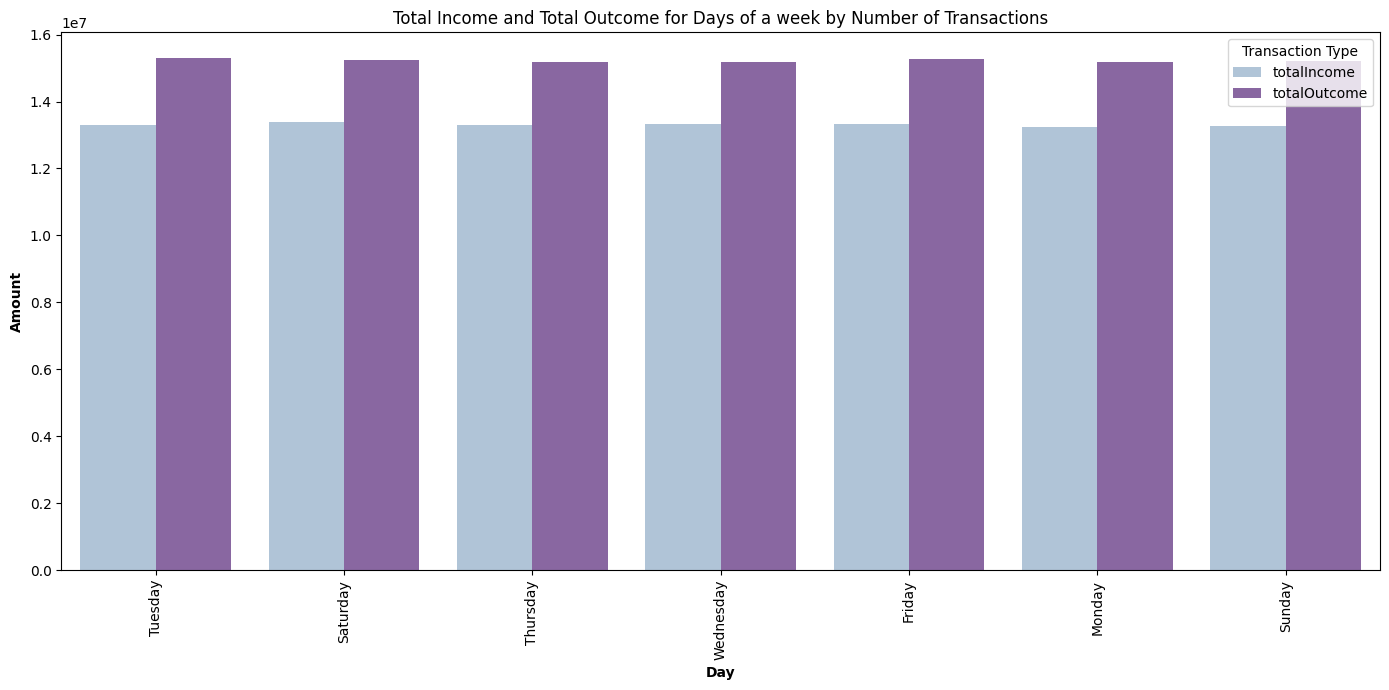

In [154]:
aggregated = df.groupby('day').agg({
    'totalIncome': 'sum',
    'totalOutcome': 'sum',
    'totalNumberTransaction': 'sum'
}).reset_index()

sorted_aggregated = aggregated.sort_values(by='totalNumberTransaction', ascending=False)

melted_df = sorted_aggregated.melt(id_vars='day', value_vars=['totalIncome', 'totalOutcome'],
                             var_name='TransactionType', value_name='Amount')

plt.figure(figsize=(14, 7))
sns.barplot(x='day', y='Amount', hue='TransactionType', data=melted_df, palette='BuPu')

plt.xlabel('Day', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.title('Total Income and Total Outcome for Days of a week by Number of Transactions')
plt.xticks(rotation=90)
plt.legend(title='Transaction Type')

plt.tight_layout()
plt.show()


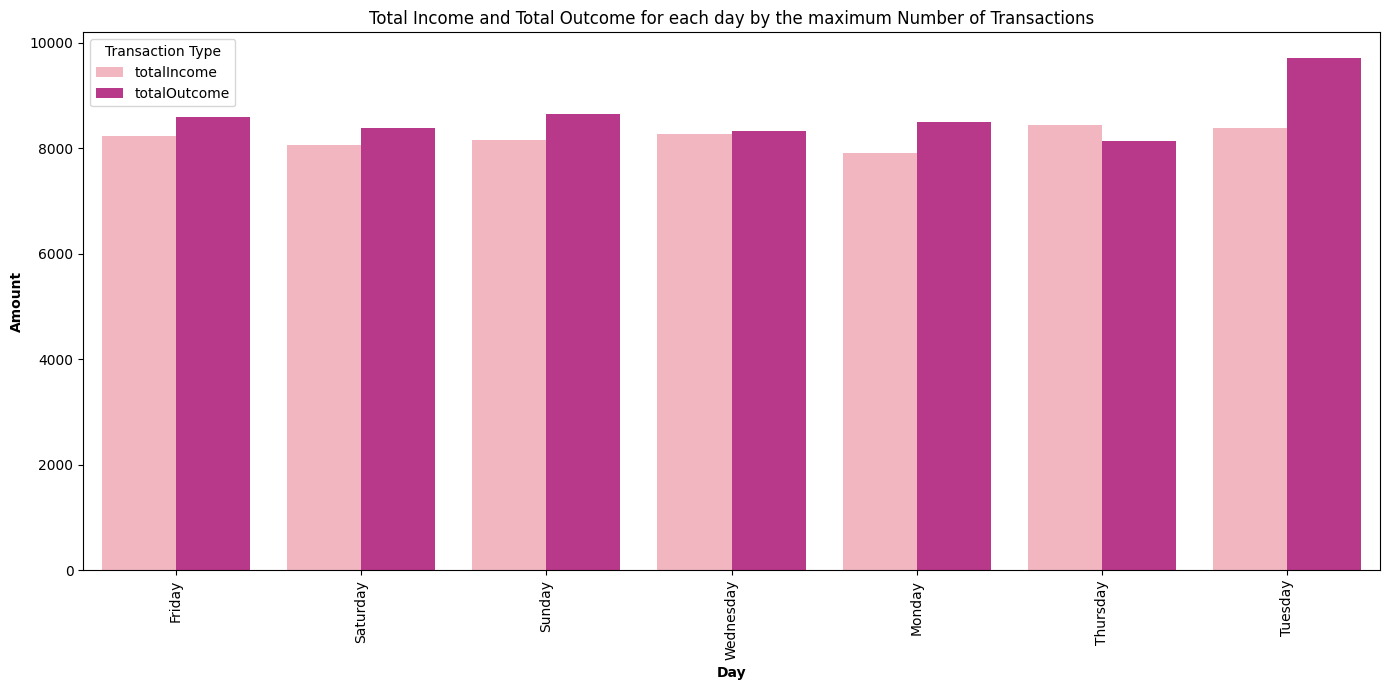

In [161]:
aggregated = df.groupby('day').agg({
    'totalIncome': 'max',
    'totalOutcome': 'max',
    'totalNumberTransaction': 'max'
}).reset_index()

sorted_aggregated = aggregated.sort_values(by='totalNumberTransaction', ascending=False)

melted_df = sorted_aggregated.melt(id_vars='day', value_vars=['totalIncome', 'totalOutcome'],
                             var_name='TransactionType', value_name='Amount')

plt.figure(figsize=(14, 7))
sns.barplot(x='day', y='Amount', hue='TransactionType', data=melted_df, palette='RdPu')

plt.xlabel('Day', fontweight='bold')
plt.ylabel('Amount', fontweight='bold')
plt.title('Total Income and Total Outcome for each day by the maximum Number of Transactions')
plt.xticks(rotation=90)
plt.legend(title='Transaction Type')

plt.tight_layout()
plt.show()


In [225]:
# atmAddress associated with the highest summed totalNumberTransaction for each day over a month

agg = df.groupby(['day', 'atmAddress'])['totalNumberTransaction'].sum().reset_index()
idx = agg.groupby('day')['totalNumberTransaction'].idxmax()

agg.loc[idx].reset_index()

,index,day,atmAddress,totalNumberTransaction
0,54,Friday,Aşık Veysel Mahallesi Yeşillik Caddesi No: 443,3791
1,703,Monday,İnönü Mahallesi 130/1 Sokak No: 3 / A Ayrancılar,3850
2,951,Saturday,Ord. Prof. Dr. Ekrem Akurgal Caddesi No: 18 / A,3769
3,1308,Sunday,Ord. Prof. Dr. Ekrem Akurgal Caddesi No: 18 / A,3683
4,1482,Thursday,Aşık Veysel Mahallesi Yeşillik Caddesi No: 443,3748
5,2131,Tuesday,İnönü Mahallesi 130/1 Sokak No: 3 / A Ayrancılar,3705
6,2212,Wednesday,Bahçelievler Mahallesi Girne Caddesi No: 170 / A,3804


In [202]:
# atmName associated with the highest totalNumberTransaction in a day for each day

idx = df.groupby('day')['totalNumberTransaction'].idxmax()
result = df.loc[idx].reset_index()

result[['atmName', 'atmAddress', 'totalNumberTransaction', 'day']].sort_values(by='totalNumberTransaction', ascending=False)

,atmName,atmAddress,totalNumberTransaction,day
0,KONAK GAZİ CADDESİ,GAZİ BUL.NO:87-C ÇANKAYA,200,Friday
2,EGEPARK MAVİŞEHİR AVM,EGEPARK AVM,200,Saturday
3,KİPA TORBALI,TORBALI MAHALLESİ KİPA,200,Sunday
6,SWISS OTEL,KONAK SWISS OTELİ İÇİ,200,Wednesday
1,ALAÇATI ŞUBE-2-,Tokoğlu Mahallesi Kemalpaşa Caddesi No: 50 / A...,199,Monday
4,DİKİLİ SALİHLERALTI,SALİHLERALTI BELDESİ YAĞMUR İŞ MER.2 NOLU DÜK.ÖNÜ,199,Thursday
5,PINARBAŞI ŞUBE-1,Pınar Caddesi No: 93 Pınarbaşı,199,Tuesday


In [230]:
# atmAddress associated with the highest summed totalIncome for each day over a month

agg = df.groupby(['day', 'atmAddress'])['totalIncome'].sum().reset_index()
idx = agg.groupby('day')['totalIncome'].idxmax()

agg.loc[idx]

,day,atmAddress,totalIncome
70,Friday,Bahçelievler Mahallesi Girne Caddesi No: 170 / A,127425
703,Monday,İnönü Mahallesi 130/1 Sokak No: 3 / A Ayrancılar,117880
951,Saturday,Ord. Prof. Dr. Ekrem Akurgal Caddesi No: 18 / A,121485
1417,Sunday,İnönü Mahallesi 130/1 Sokak No: 3 / A Ayrancılar,117180
1665,Thursday,Ord. Prof. Dr. Ekrem Akurgal Caddesi No: 18 / A,111190
2131,Tuesday,İnönü Mahallesi 130/1 Sokak No: 3 / A Ayrancılar,118960
2196,Wednesday,Aşık Veysel Mahallesi Yeşillik Caddesi No: 443,118685


In [203]:
# atmName associated with the highest totalIncome in a day for each day

idx = df.groupby('day')['totalIncome'].idxmax()
result = df.loc[idx].reset_index()

result[['atmName', 'atmAddress', 'totalIncome', 'day']].sort_values(by='totalIncome', ascending=False)

,atmName,atmAddress,totalIncome,day
4,MAVİŞEHİR ALBATROS SİTESİ,ALBATROS SİTESİ MAVİŞEHİR,8440,Thursday
5,PINARBAŞI ŞUBE-1,Pınar Caddesi No: 93 Pınarbaşı,8375,Tuesday
6,ALSANCAK İZBAN METRO,ALSANCAK METRO İSTASYONU,8260,Wednesday
0,MAVİŞEHİR ALBATROS SİTESİ,ALBATROS SİTESİ MAVİŞEHİR,8225,Friday
3,2.SANAYİ SİTESİ ŞB-2,Kazımdirik Mahallesi 351 Sokak No: 3 B,8150,Sunday
2,ÇANDARLI/DİKİLİ,ÇANDARLI MAHALLESİ BERGAMA CAD.,8055,Saturday
1,GİRNE CADDESİ ŞB-2,Bahçelievler Mahallesi Girne Caddesi No: 170 / A,7905,Monday


In [231]:
# atmAddress associated with the highest summed totalOutcome for each day over a month

agg = df.groupby(['day', 'atmAddress'])['totalOutcome'].sum().reset_index()
idx = agg.groupby('day')['totalOutcome'].idxmax()

agg.loc[idx]

,day,atmAddress,totalOutcome
54,Friday,Aşık Veysel Mahallesi Yeşillik Caddesi No: 443,133910
703,Monday,İnönü Mahallesi 130/1 Sokak No: 3 / A Ayrancılar,136575
951,Saturday,Ord. Prof. Dr. Ekrem Akurgal Caddesi No: 18 / A,130385
1117,Sunday,Anadolu Caddesi No: 798,126890
1482,Thursday,Aşık Veysel Mahallesi Yeşillik Caddesi No: 443,132040
1887,Tuesday,Erzene Mahallesi 2 Sokak No: 7 / A,124575
2379,Wednesday,Ord. Prof. Dr. Ekrem Akurgal Caddesi No: 18 / A,124075


In [204]:
# atmName associated with the highest totalOutcome in a day for each day

idx = df.groupby('day')['totalOutcome'].idxmax()
result = df.loc[idx].reset_index()

result[['atmName', 'atmAddress', 'totalOutcome', 'day']].sort_values(by='totalOutcome', ascending=False)

,atmName,atmAddress,totalOutcome,day
5,2.SANAYİ SİTESİ ŞB-2,Kazımdirik Mahallesi 351 Sokak No: 3 B,9710,Tuesday
3,BOZYAKA ŞUBE-1,Eski İzmir Caddesi No: 133 Bozyaka,8655,Sunday
0,PEPSİ KEMALPAŞA,KEMALPAŞA ASFALTI NO:57 KEMALPAŞA,8595,Friday
1,PINAR SÜT OTOPARK,KEMALPAŞA ASFALTI NO:1 PINARBAŞI,8495,Monday
2,MENDERES ŞUBE-1,Kemalpaşa Mahallesi Atatürk Caddesi No: 12,8375,Saturday
6,URLA MEYDAN AVM ÖNÜ,HACİ İSA MAHALLESİ BARATALI BULVARI NO:40/71 A...,8325,Wednesday
4,ÖZKANLAR METRO İSTASYONU,ÖZKANLAR METRO İSTASYONU BORNOVA İZMİR,8135,Thursday


In [239]:
res = df['totalOutcome'].value_counts()